# Example 1: Fitting Fourier Transformed Data
###### Author: Malthe Asmus Marciniak Nielsen

This example shows how to plot afourier transformed data, plot it with a Lorentzian model and plot the residuals of the fit.

## Step 1: Import packages 
We import both the Plotter, Fitter, fitmodels, load_labber_file and os. load_labber_file is required to exstrate the data from Labber files.

In [1]:
from dataanalyzer import Plotter, Fitter, fitmodels, load_labber_file
import os

# Step 2: Load the data
We load the data using os and load_labber_file. If inspect = True in load_labber_file, the parameter names will be automatically printed.

In [2]:
z_drive = r"Z:\Malthe\DataAnalyzer\sample_data" if os.name == "nt" else "/Volumes/users/Malthe/DataAnalyzer/sample_data"
path = os.path.join(z_drive, "Data_Resonator_Frequency.hdf5")

[freq], [pulse] = load_labber_file(path, insepct=True)

Insepcting Labber File...
File is containing 1 parameters:
	RS Readout - Frequency
File is containing 1 results:
	Pulse Generator - Voltage, QB1


# Step 3: Initalize Fitter
We initialize the Fitter and defines the function for fitting. Then we do the fit.

In [3]:
# Setting up function
func = fitmodels.LorentzianModel()

# Initialize fitter
fit = Fitter(x=freq, y=pulse.real.fft, func=func)

# Fit data
freq_fit, pulse_fit, params, report = fit.do_fit()

# Step 4: Initalize Plotter
We plot the data and the fitted model along with a vertical line at the center value.

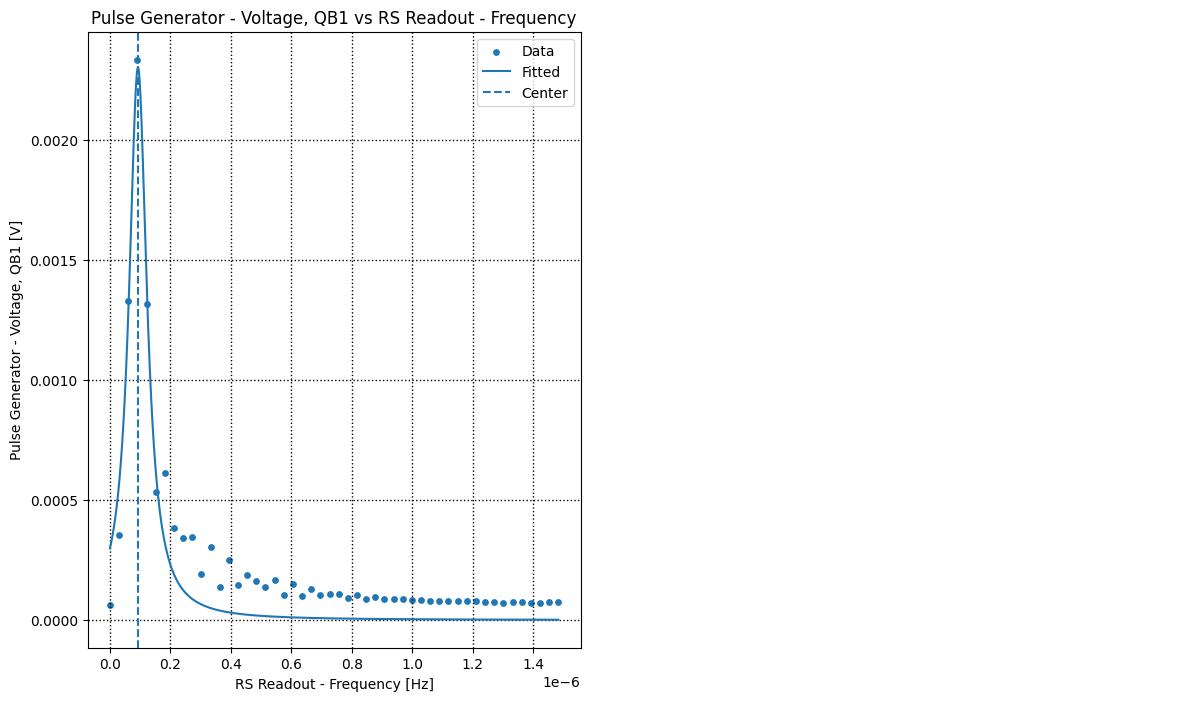

In [4]:
# Initialize plotter
plot = Plotter()

# Add data
plot.scatter(freq.fftfreq, pulse.real.fft, label="Data")
plot.plot(x=freq_fit, y=pulse_fit, label="Fitted")

# Add center
plot.axvline(params["center"]["value"], label="Center")

# Step 5: Add residuals
We calculate the residuals and plot them.

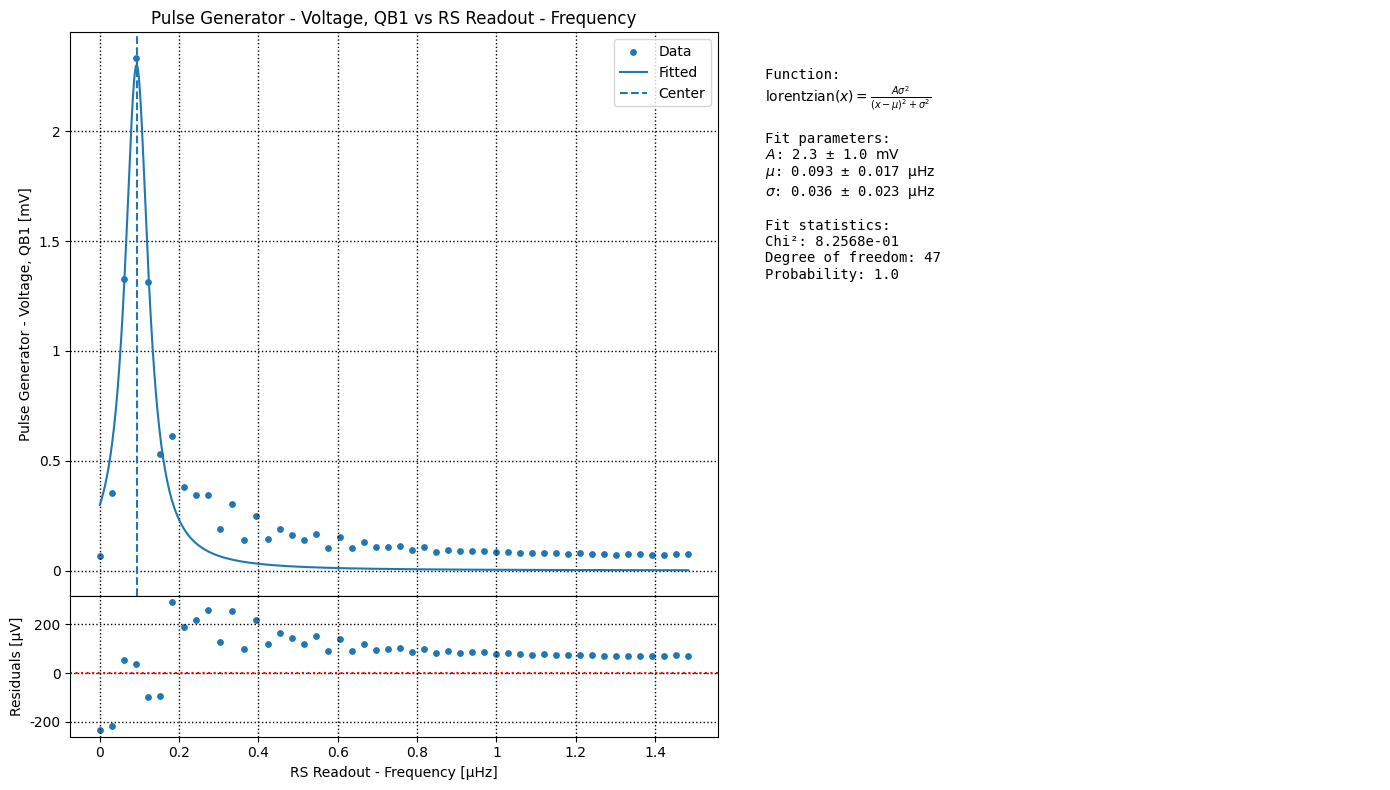

In [5]:
# Calculate residuals
residuals = fit.get_residuals()

# Add residuals
plot.add_xresiuals(freq, residuals)

# Add report to plot (metadata)
plot.add_metadata(report)

# Show plot
plot.show()